In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

In [3]:
df = pd.read_csv('diabetes.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Vemos si hay valores que son 0 
print((df['Glucose'] == 0).sum())
print((df['BloodPressure'] == 0).sum())
print((df['SkinThickness'] == 0).sum())
print((df['Insulin'] == 0).sum())
print((df['BMI'] == 0).sum())
print((df['DiabetesPedigreeFunction'] == 0).sum())
print((df['Age'] == 0).sum())

5
35
227
374
11
0
0


<Axes: xlabel='BMI', ylabel='Count'>

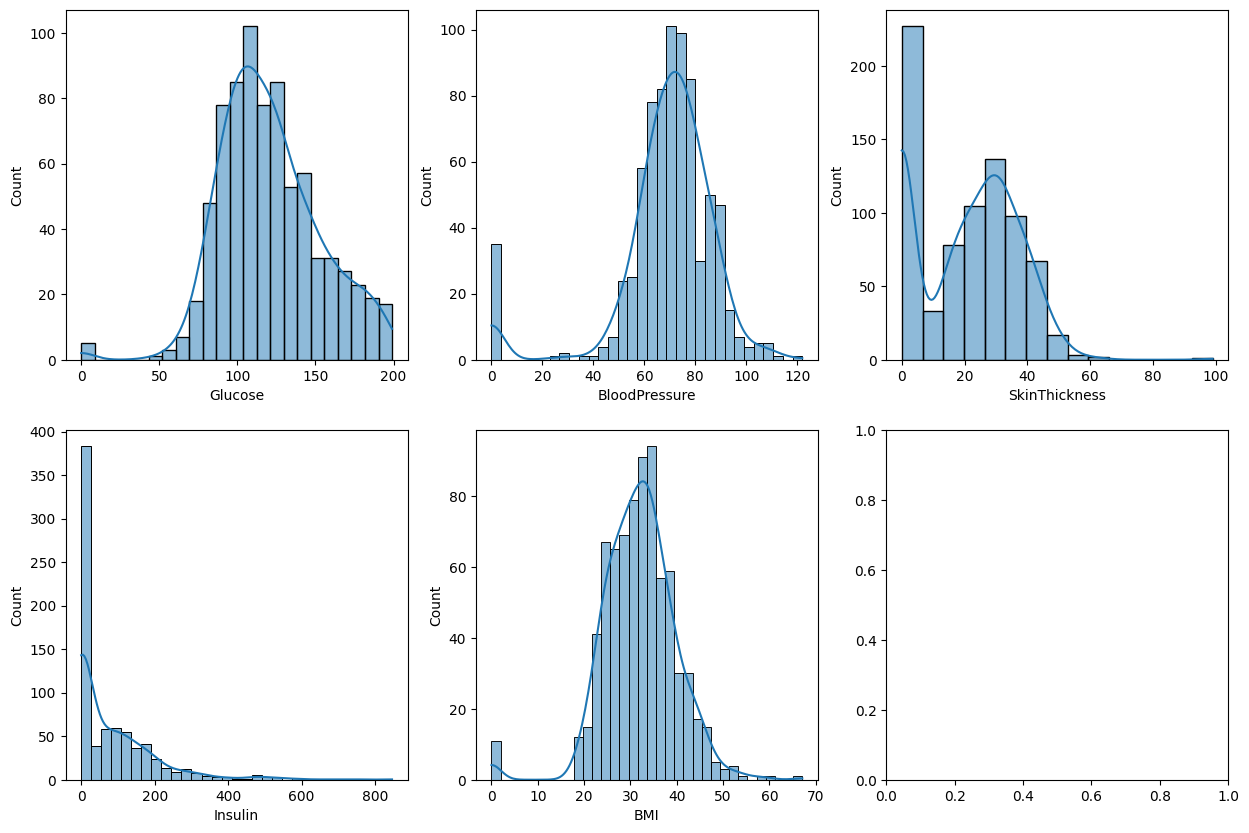

In [5]:
#checking for the data distribution type to identity impute method for missing values.
fig, axes = plt.subplots(2,3, figsize=(15, 10))

sns.histplot(df.Glucose, ax= axes[0,0], kde=True)
sns.histplot(df.BloodPressure,  ax= axes[0,1],kde=True)
sns.histplot(df.SkinThickness,  ax= axes[0,2], kde=True)
sns.histplot(df.Insulin,  ax= axes[1,0], kde=True)
sns.histplot(df.BMI,  ax= axes[1,1], kde=True)


In [6]:

df['Glucose'].replace(0, df['Glucose'].mean(), inplace=True) # Distribucion normal
# Reemplazar los valores de 'BloodPressure' menores que 50 con la media
blood_pressure_mean = df['BloodPressure'].mean() # Distribucion normal
df.loc[df['BloodPressure'] < 50, 'BloodPressure'] = blood_pressure_mean
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True) # Distribucion asimetrica
df['BMI'].replace(0, df['BMI'].median(), inplace=True) # Distribucion asimetrica
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace=True) # Distribucion asimetrica

<Axes: >

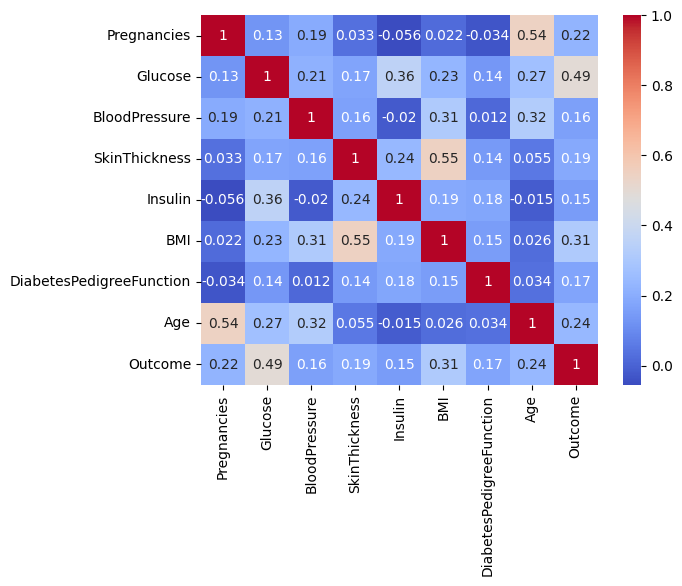

In [7]:
sns.heatmap(df.corr(),annot =True, cmap='coolwarm')

In [8]:

df['Outcome'] = df['Outcome'].astype('category',copy=False)

# Convertimos  0/1 a valores  'Si'/'No'
def convert_outcome(x):
    if x == 1:
        return 'Si'
    else:
        return 'No'

df['Outcome'] = df['Outcome'].apply(convert_outcome)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 49.0 KB


In [9]:
df.describe()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.822108,27.334635,94.652344,32.450911,0.471876,33.240885
std,3.369578,30.436016,11.238625,9.229014,105.547598,6.875366,0.331329,11.760232
min,0.000000,44.000000,50.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,65.750000,23.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
dfg = df['Outcome'].value_counts().reset_index()
dfg.columns = ['Outcome', 'Quantity']
fig = px.bar(dfg, x='Outcome', y='Quantity', title='Quantity of Patients by Outcome' ) 
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Outcome vs. Pregnancies</b>',
                                                    '<b>Outcome vs. Glucose</b>',
                                                    '<b>Outcome vs. Blood Pressure</b>',
                                                    '<b>Outcome vs. Skin Thickness</b>',
                                                    '<b>Outcome vs. Insulin</b>',
                                                    '<b>Outcome vs. BMI</b>',
                                                    '<b>Outcome vs. Diabetes Pedigree Func.</b>',
                                                    '<b>Outcome vs. Age</b>'
                                                   ))

fig.add_trace(go.Box(y=df['Pregnancies'], x=df['Outcome']), row=1, col=1)
fig.add_trace(go.Box(y=df['Glucose'], x=df['Outcome']), row=1, col=2)
fig.add_trace(go.Box(y=df['BloodPressure'], x=df['Outcome']), row=1, col=3)
fig.add_trace(go.Box(y=df['SkinThickness'], x=df['Outcome']), row=1, col=4)
fig.add_trace(go.Box(y=df['Insulin'], x=df['Outcome']), row=2, col=1)
fig.add_trace(go.Box(y=df['BMI'], x=df['Outcome']), row=2, col=2)
fig.add_trace(go.Box(y=df['DiabetesPedigreeFunction'], x=df['Outcome']), row=2, col=3)
fig.add_trace(go.Box(y=df['Age'], x=df['Outcome']), row=2, col=4)

                                
# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

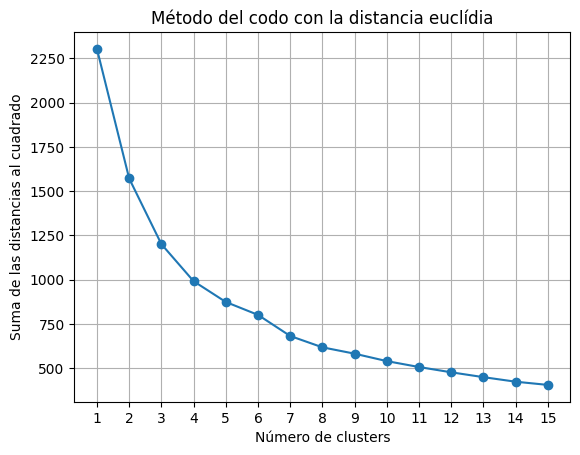

Promedio del Coeficiente de Silueta: 0.2802107859193026


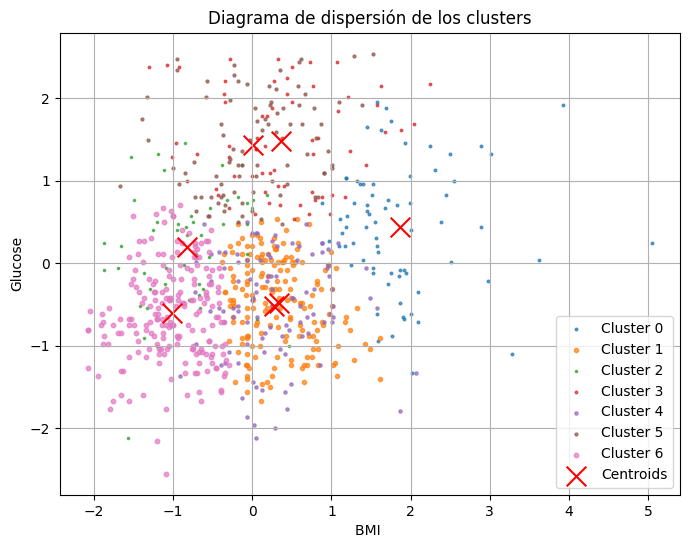

         BMI     Glucose        Age
0  45.261111  134.901313  29.777778
1  34.736464  107.132014  25.635359
2  26.826531  127.632653  59.285714
3  34.962121  166.712121  48.878788
4  34.377143  105.970424  43.476190
5  32.560674  165.146067  30.056180
6  25.469417  103.231986  26.087379


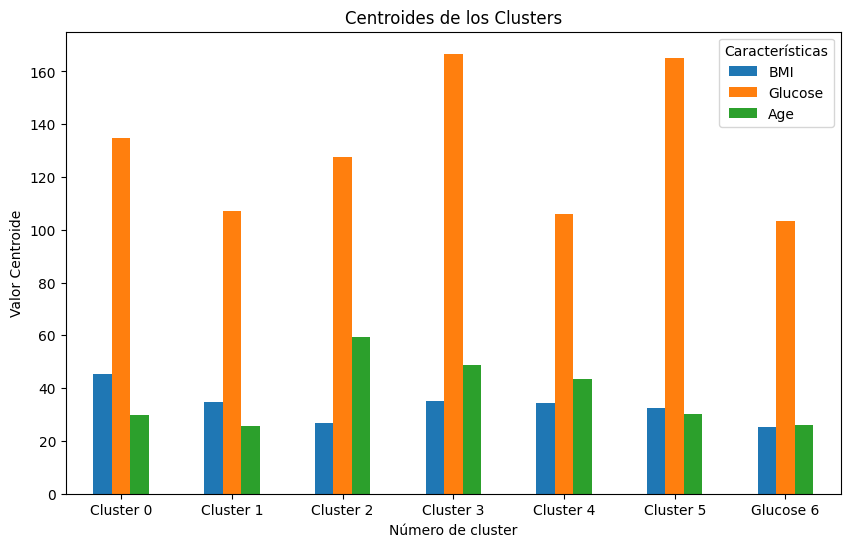

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asumiendo que df es tu DataFrame y todas las columnas excepto la última son características
X = df[['BMI', 'Glucose','Age']]  # Ajusta esto si tu estructura de datos es diferente
#SON LOS QUE MAYOR RELACIÓN TIENEN EN LA MATRIZ DE CORRELACIÓN
#TB podemos probar con los que tienen mayor relación con el outcome
#hay que decidir y justificar que variables cogemos, intentar ajustar la distancia (esta es la euclidia) 

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo
def elbow_method(X, max_k):
    ssd_values = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        ssd_values.append(kmeans.inertia_)
    return ssd_values

# Ejecutar método del codo
max_k = 15
ssd_values = elbow_method(X_scaled, max_k)

# Graficar el método del codo
plt.plot(range(1, max_k + 1), ssd_values, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del codo con la distancia euclídia')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()


# Elegir un valor de k específico
k_chosen = 7
kmeans = KMeans(n_clusters=k_chosen, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
cluster_centers = kmeans.cluster_centers_

# Calcular el tamaño de cada cluster
cluster_sizes = np.bincount(clusters)

# Visualización de los clusters
#plt.figure(figsize=(8, 6))
#plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x', label='Centroids')
#plt.title(f'Visualization of Clusters formed by K-Means (k={k_chosen})')
#plt.xlabel('Feature 1 (scaled)')
#plt.ylabel('Feature 2 (scaled)')
#plt.legend()
#plt.grid(True)
#plt.show()

# Calcular coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Promedio del Coeficiente de Silueta:", silhouette_avg)
# Graficar el diagrama de dispersión con colores de cluster y tamaño de cluster
plt.figure(figsize=(8, 6))
for cluster_label in range(k_chosen):
    cluster_points = X_scaled[clusters == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', alpha=0.7, s=cluster_sizes[cluster_label]*0.05)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('Diagrama de dispersión de los clusters')
plt.xlabel('BMI ')
plt.ylabel('Glucose')
plt.legend()
plt.grid(True)
plt.show()

centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
# Crear un DataFrame para los centroides para mejor visualización
centroids_df = pd.DataFrame(centroids, columns=['BMI','Glucose','Age'])


print(centroids_df)

# Visualizar los centroides usando un gráfico de barras
centroids_df[['BMI', 'Glucose','Age']].plot(kind='bar', figsize=(10, 6))
plt.title('Centroides de los Clusters')
plt.xlabel('Número de cluster')
plt.ylabel('Valor Centroide')
plt.xticks(ticks=range(len(centroids_df)), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Glucose 6'], rotation=0)
plt.legend(title='Características')
plt.show()


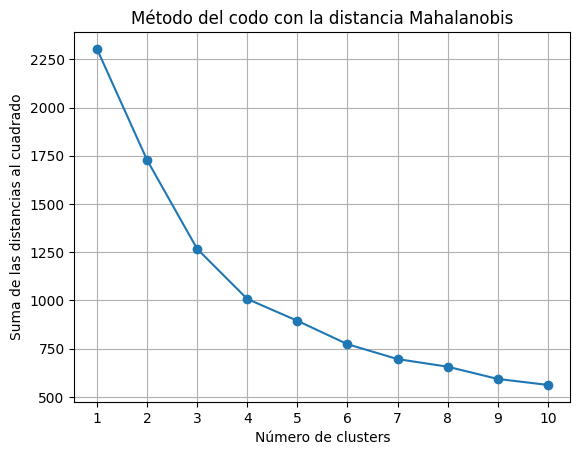

Promedio del Coeficiente de Silueta: 0.28566911744352946


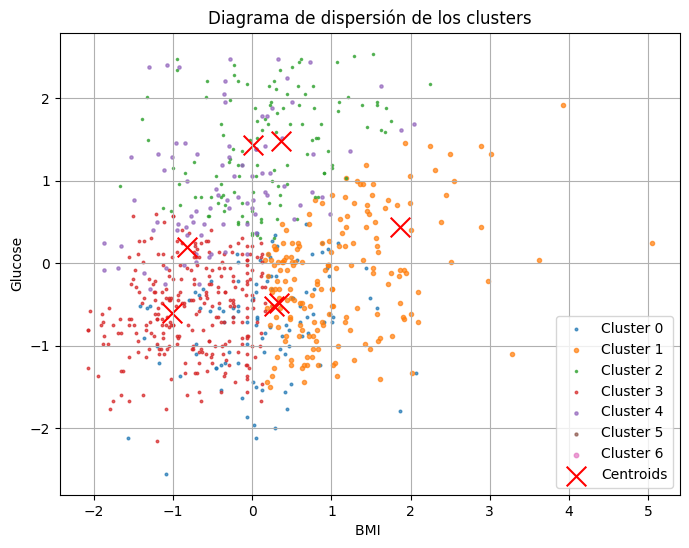

         BMI     Glucose        Age
0  45.261111  134.901313  29.777778
1  34.736464  107.132014  25.635359
2  26.826531  127.632653  59.285714
3  34.962121  166.712121  48.878788
4  34.377143  105.970424  43.476190
5  32.560674  165.146067  30.056180
6  25.469417  103.231986  26.087379


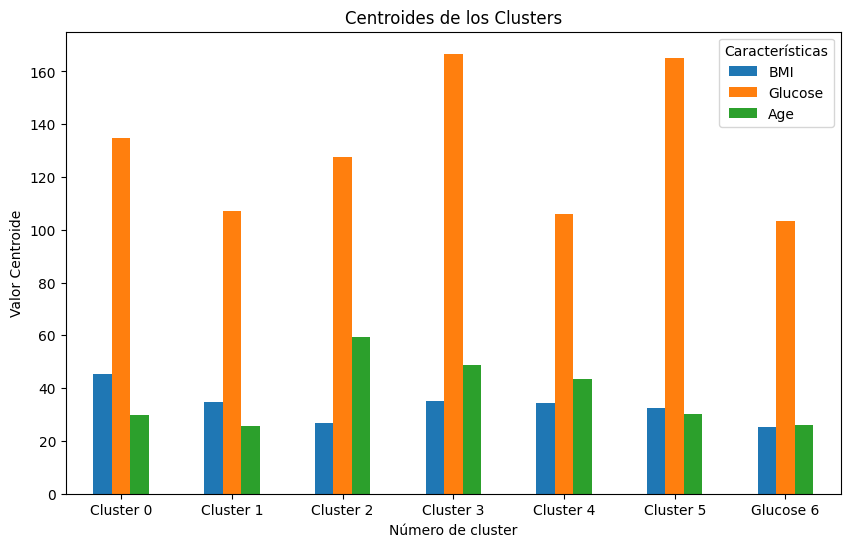

In [ ]:
import numpy as np
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

X = df[['BMI', 'Glucose','Age']] 
class KMeansMahalanobis:
    def __init__(self, n_clusters=8, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None

    def _initialize_centroids(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]

    def _mahalanobis_dist(self, x, y, VI):
        return distance.mahalanobis(x, y, VI)

    def fit(self, X):
        X = np.asarray(X)
        self._initialize_centroids(X)
        for _ in range(self.max_iter):
            old_centroids = self.centroids.copy()
            clusters = []
            for x in X:
                distances = [self._mahalanobis_dist(x, centroid, np.linalg.inv(np.cov(X, rowvar=False))) for centroid in self.centroids]
                cluster = np.argmin(distances)
                clusters.append(cluster)
            clusters = np.array(clusters)
            new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.allclose(old_centroids, new_centroids, atol=self.tol):
                break
            self.centroids = new_centroids
        return clusters


# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo
def elbow_method(X, max_k):
    ssd_values = []
    for k in range(1, max_k + 1):
        kmeans_mahalanobis = KMeansMahalanobis(n_clusters=k)
        clusters = kmeans_mahalanobis.fit(X)
        ssd = 0
        for i, centroid in enumerate(kmeans_mahalanobis.centroids):
            ssd += np.sum((X[clusters == i] - centroid) ** 2)
        ssd_values.append(ssd)
    return ssd_values

# Ejecutar método del codo
max_k = 10
ssd_values = elbow_method(X_scaled, max_k)

# Graficar el método del codo
plt.plot(range(1, max_k + 1), ssd_values, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del codo con la distancia Mahalanobis')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

# Ejemplo de uso
kmeans_mahalanobis = KMeansMahalanobis(n_clusters=5, random_state=42)
clusters = kmeans_mahalanobis.fit(X_scaled)

# Visualizar los clusters
# Calcular coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Promedio del Coeficiente de Silueta:", silhouette_avg)
# Graficar el diagrama de dispersión con colores de cluster y tamaño de cluster
plt.figure(figsize=(8, 6))
for cluster_label in range(k_chosen):
    cluster_points = X_scaled[clusters == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', alpha=0.7, s=cluster_sizes[cluster_label]*0.05)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('Diagrama de dispersión de los clusters')
plt.xlabel('BMI ')
plt.ylabel('Glucose')
plt.legend()
plt.grid(True)
plt.show()
#calculo los centroides
centroids = kmeans.cluster_centers_

centroids = scaler.inverse_transform(centroids)
# Crear un DataFrame para los centroides para mejor visualización
centroids_df = pd.DataFrame(centroids, columns=['BMI','Glucose','Age'])


print(centroids_df)

# Visualizar los centroides usando un gráfico de barras
centroids_df[['BMI', 'Glucose','Age']].plot(kind='bar', figsize=(10, 6))
plt.title('Centroides de los Clusters')
plt.xlabel('Número de cluster')
plt.ylabel('Valor Centroide')
plt.xticks(ticks=range(len(centroids_df)), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Glucose 6'], rotation=0)
plt.legend(title='Características')
plt.show()




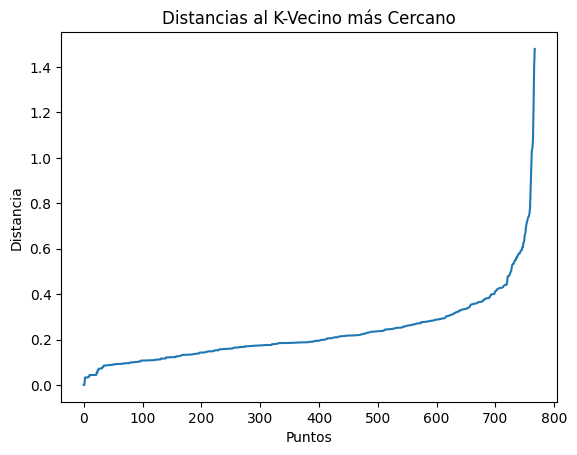

/tmp/ipykernel_5854/2294527659.py:46: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



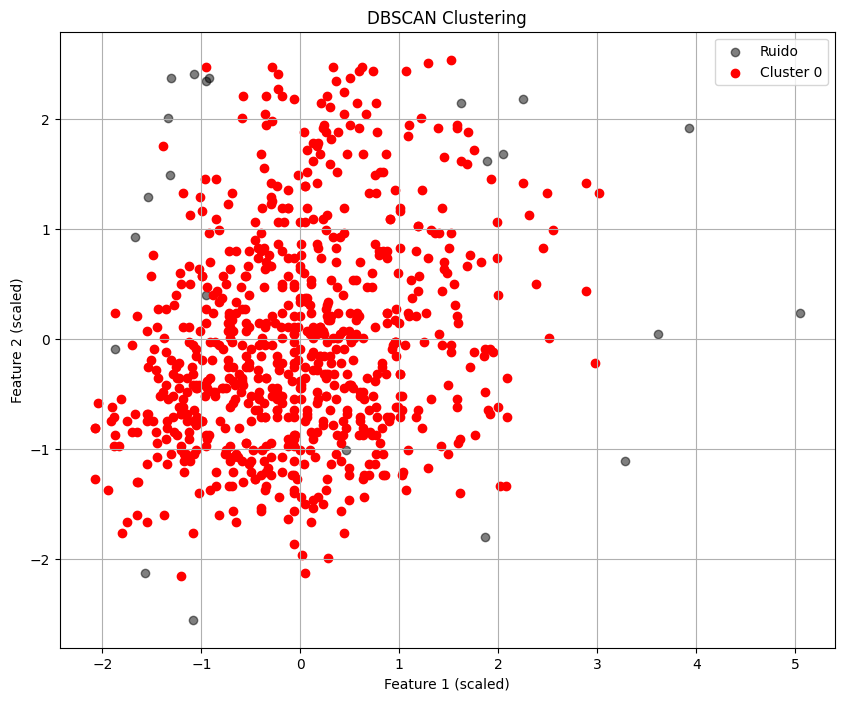

Promedio del Coeficiente de Silueta: 0.3896367048367895
               BMI     Glucose        Age
Cluster                                  
-1       35.704545  144.909091  47.681818
 0       32.354960  120.996612  32.815013


/tmp/ipykernel_5854/2294527659.py:60: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap

# Asumiendo que df es tu DataFrame y que las características relevantes ya están seleccionadas
X = df[['BMI', 'Glucose', 'Age']]  # Ajusta esto si tu estructura de datos es diferente

# Escalar los datos para el clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar el valor de eps usando el método del k-vecino más cercano
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.title('Distancias al K-Vecino más Cercano')
plt.xlabel('Puntos')
plt.ylabel('Distancia')
plt.show()

# DBSCAN clustering
eps = distances[755]
min_samples = 4
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

# Preparar colores para los clusters
cmap = ListedColormap(['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink'])
cluster_colors = [cmap(i) for i in np.unique(clusters) if i != -1]
cluster_colors.append('black')  # Color para ruido

# Visualizar los clusters
plt.figure(figsize=(10, 8))
for cluster in np.unique(clusters):
    row_ix = np.where(clusters == cluster)
    if cluster == -1:  # Ruido
        plt.scatter(X_scaled[row_ix, 0], X_scaled[row_ix, 1], c='black', label='Ruido', alpha=0.5)
    else:
        plt.scatter(X_scaled[row_ix, 0], X_scaled[row_ix, 1], c=cmap(cluster), label=f'Cluster {cluster}')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular y mostrar el coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Promedio del Coeficiente de Silueta:", silhouette_avg)

# Analizar y describir cada cluster
df['Cluster'] = clusters
cluster_descriptions = df.groupby('Cluster').mean()
print(cluster_descriptions[['BMI', 'Glucose', 'Age']])



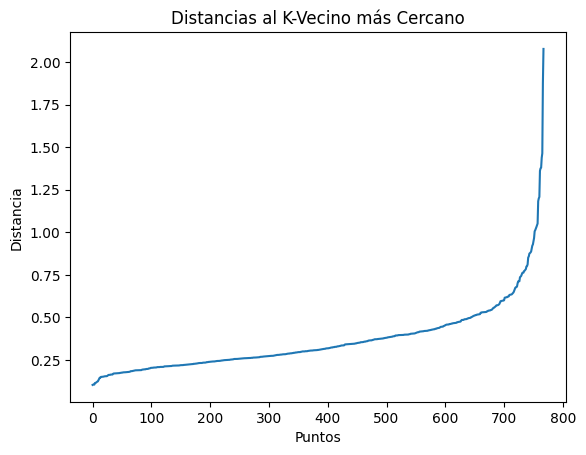

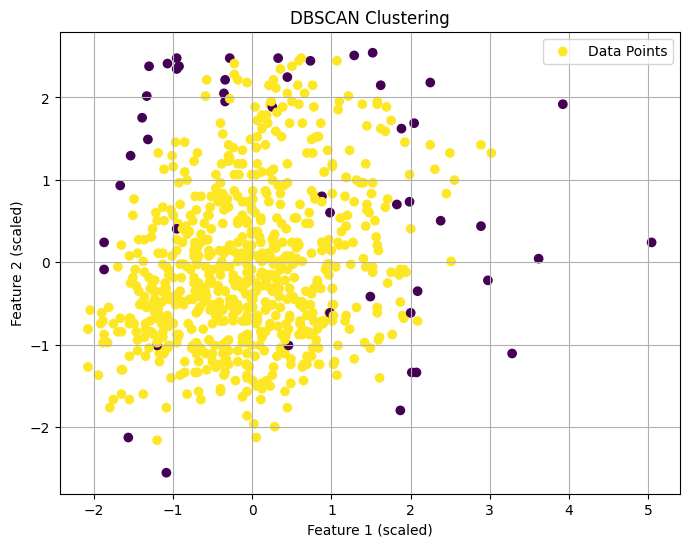

Promedio del Coeficiente de Silueta: 0.3501791166727271


In [ ]:

from sklearn.cluster import DBSCAN
from scipy.spatial import distance
from scipy.linalg import inv
from scipy.spatial import distance_matrix


# Asumiendo que df es tu DataFrame y todas las columnas excepto la última son características
X = df[['BMI', 'Glucose','Age']]  # Ajusta esto si tu estructura de datos es diferente

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cov_matrix = np.cov(X_scaled, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Definir la función de distancia de Mahalanobis
def mahalanobis_distance(x, y):
    difference = x - y
    return np.sqrt(np.dot(np.dot(difference, inv_cov_matrix), difference.T))

# Encontrar el valor de eps utilizando el método del k-vecino más cercano
neighbors = NearestNeighbors(n_neighbors=5, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)[:, 3]  # Usando el quinto vecino más cercano
plt.plot(distances)
plt.title('Distancias al K-Vecino más Cercano')
plt.xlabel('Puntos')
plt.ylabel('Distancia')
plt.show()

# El valor de eps puede ser elegido observando el gráfico anterior
eps_value = distances[700]  # Esto debería ser ajustado basado en tu gráfico

# Calcular las distancias de Mahalanobis entre todos los pares de puntos
distance_matrix = distance_matrix(X_scaled, X_scaled, p=2)  # Usando norma L2 por simplicidad

# Aplicar DBSCAN usando la matriz de distancias precalculada
dbscan = DBSCAN(metric="precomputed", eps=eps_value, min_samples=5)
clusters = dbscan.fit_predict(distance_matrix)

# Añadir clústeres al DataFrame
df['Cluster'] = clusters
# Visualizar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular y mostrar el coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Promedio del Coeficiente de Silueta:", silhouette_avg)